In [1]:
import numpy as np
import pandas as pd

## 1. Reading Data Set

### 1.1. HS300 index overview

In [4]:
df_hs300 = pd.read_csv("01_data/hs300.csv")
df_hs300["交易日期"] = pd.to_datetime(df_hs300["交易日期"])
df_hs300.head()

,交易日期,开盘点位,最高点位,最低点位,收盘价,成交量(万股),成交额(万),涨跌幅(%)
0,2007-01-04,2073.25,2139.49,2054.24,2067.09,1067197.07,8238107.26,1.28
1,2007-01-05,2051.15,2083.40,2030.76,2072.88,927434.47,6802606.02,0.28
2,2007-01-08,2072.01,2131.74,2071.72,2131.56,847679.09,6630393.61,2.83
3,2007-01-09,2137.49,2201.36,2128.06,2200.09,815776.29,6545619.27,3.22
4,2007-01-10,2210.76,2255.97,2194.77,2255.97,849049.79,6882262.48,2.54


### 1.2. HS300 stocks and weights

In [6]:
df_hs300_c_s = pd.read_csv("01_data/hs300_constituent_stocks.csv")
df_hs300_c_s["交易日期"] = pd.to_datetime(df_hs300_c_s["交易日期"])
df_hs300_c_s.head()

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重
0,2007-01-04,1,14.65,15.32,13.83,14.11,69207082.0,1.016723e+09,2.745555e+10,1.409362e+09,-0.0249,1.27
1,2007-01-04,2,15.70,16.56,15.28,15.48,75119519.0,1.206786e+09,6.764603e+10,3.254255e+09,0.0026,3.32
2,2007-01-04,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16
3,2007-01-04,12,11.15,11.30,10.66,10.95,6934903.0,7.560341e+07,1.111932e+10,2.176753e+08,-0.0045,0.14
4,2007-01-04,21,8.38,8.75,8.33,8.38,9271213.0,7.938714e+07,7.370365e+09,3.116781e+08,0.0060,0.17


### 1.3. HS300 constituents stocks predict

In [8]:
df_hs300_c_s_p = pd.read_csv("01_data/hs300_constituent_stocks_predict.csv")
df_hs300_c_s_p = df_hs300_c_s_p.rename(columns={'date': '交易日期','code': '股票代码'})
df_hs300_c_s_p["交易日期"] = pd.to_datetime(df_hs300_c_s_p["交易日期"])
df_hs300_c_s_p.head()

,交易日期,股票代码,pred
0,2021-01-04,1,183.0
1,2021-01-04,2,279.0
2,2021-01-04,63,192.0
3,2021-01-04,66,259.0
4,2021-01-04,69,165.0


## 2. Data Explore

### 2.1. Describe HS300 Index

2.1.1. HS300 Close Price Line

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [13]:
df_hs300[['交易日期','收盘价']]

,交易日期,收盘价
0,2007-01-04,2067.09
1,2007-01-05,2072.88
2,2007-01-08,2131.56
3,2007-01-09,2200.09
4,2007-01-10,2255.97
...,...,...
4128,2023-12-25,3347.45
4129,2023-12-26,3324.79
4130,2023-12-27,3336.36
4131,2023-12-28,3414.54


In [14]:
date = np.array(df_hs300['交易日期'])
date = date.astype(np.datetime64)
close = np.array(df_hs300['收盘价'])

In [15]:
# 定义采样间隔（例如：按天采样）
interval = np.timedelta64(30, 'D')  # 可选单位：'h'(小时), 'm'(分钟), 's'(秒)

# 计算每个时间点所属的时间段编号
start = date.min()
time_deltas = date - start
group_indices = (time_deltas.astype('timedelta64[s]').astype(int) 
                 // interval.astype('timedelta64[s]').astype(int))

# 分组聚合（例如：取每段时间内的均值）
unique_groups, group_ids = np.unique(group_indices, return_inverse=True)
sampled_times = start + unique_groups * interval
sampled_values = np.array([np.mean(close[group_ids == i]) 
                          for i in range(len(unique_groups))])

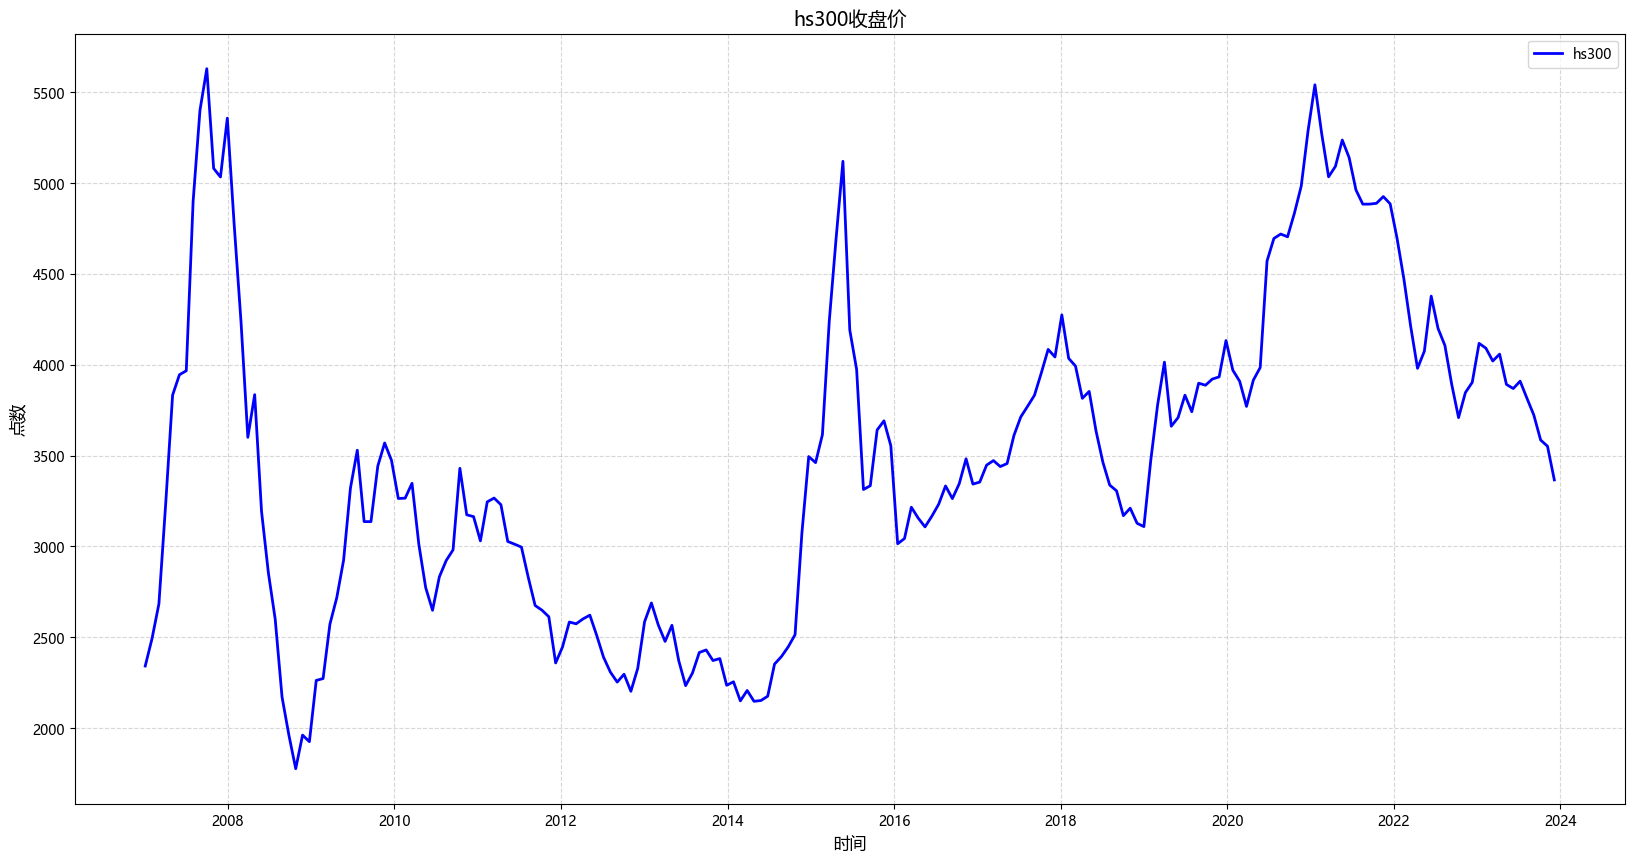

In [16]:
# 绘制曲线图
plt.figure(figsize=(20, 10))         # 设置图像大小
plt.plot(sampled_times, sampled_values, label='hs300', color='blue', linestyle='-', linewidth=2)

# 添加标题和标签
plt.title('hs300收盘价', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('点数', fontsize=12)

# 添加图例和网格
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# 显示图像
plt.show()

#### 2.2.2 HS300 Correlation

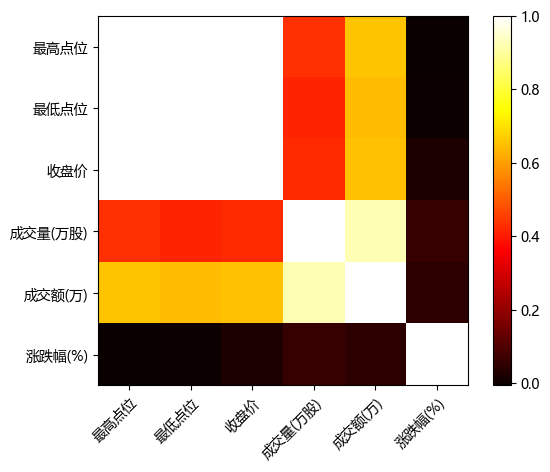

In [18]:
num_var = ['最高点位','最低点位','收盘价','成交量(万股)','成交额(万)','涨跌幅(%)']

data = df_hs300[num_var].corr()
plt.xticks(np.arange(len(num_var)), labels=num_var, 
                     rotation=45, rotation_mode="anchor", ha="right")
plt.yticks(np.arange(len(num_var)), labels=num_var) 
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

## 2.2. Describe HS300 Pre Index

#### ~~2.2.1. Correlation between pre and index~~

In [21]:
df_hs300_c_s_p_merge = pd.merge(df_hs300_c_s, df_hs300_c_s_p, on = ["交易日期", "股票代码"], how = "inner")
df_hs300_c_s_p_merge.head()

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred
0,2021-01-04,1,19.10,19.10,18.44,18.60,155421643.0,2.891682e+09,3.609501e+11,1.940575e+10,-0.038263,0.9102,183.0
1,2021-01-04,2,28.40,28.40,27.52,27.78,146844133.0,4.079417e+09,3.227406e+11,9.717553e+09,-0.032056,0.9537,279.0
2,2021-01-04,63,33.00,34.48,32.72,34.33,129647346.0,4.343080e+09,1.583792e+11,3.476254e+09,0.020208,0.4676,192.0
3,2021-01-04,66,19.25,20.89,19.18,20.70,175854423.0,3.572707e+09,6.061337e+10,2.927812e+09,0.090047,0.1834,259.0
4,2021-01-04,69,7.05,7.06,6.87,6.89,53350376.0,3.697312e+08,5.651036e+10,7.056298e+09,-0.028209,0.1425,165.0


In [22]:
df_hs300_c_s_p_merge[df_hs300_c_s_p_merge["股票代码"] == 1]

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred
0,2021-01-04,1,19.10,19.10,18.44,18.60,155421643.0,2.891682e+09,3.609501e+11,1.940575e+10,-0.038263,0.9102,183.0
295,2021-01-05,1,18.40,18.48,17.80,18.17,182135210.0,3.284607e+09,3.526055e+11,1.940575e+10,-0.023118,0.9102,243.0
590,2021-01-06,1,18.08,19.56,18.00,19.56,193494512.0,3.648522e+09,3.795798e+11,1.940575e+10,0.076500,0.9102,105.0
885,2021-01-07,1,19.52,19.98,19.23,19.90,158418530.0,3.111275e+09,3.861778e+11,1.940575e+10,0.017382,0.9102,264.0
1180,2021-01-08,1,19.90,20.10,19.31,19.85,119547322.0,2.348316e+09,3.852075e+11,1.940575e+10,-0.002513,0.9102,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214425,2023-12-25,1,9.18,9.20,9.14,9.19,41397088.0,3.796382e+08,1.783404e+11,1.940555e+10,-0.001087,0.5450,22.0
214722,2023-12-26,1,9.19,9.20,9.07,9.10,54189633.0,4.937466e+08,1.765939e+11,1.940555e+10,-0.009793,0.5450,109.0
215018,2023-12-27,1,9.10,9.13,9.02,9.12,64153435.0,5.820367e+08,1.769820e+11,1.940555e+10,0.002198,0.5450,146.0
215315,2023-12-28,1,9.11,9.47,9.08,9.45,166159184.0,1.550257e+09,1.833859e+11,1.940555e+10,0.036184,0.5450,129.0


In [23]:
df_hs300_c_s_p_merge[df_hs300_c_s_p_merge["股票代码"] == 63]

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred
2,2021-01-04,63,33.00,34.48,32.72,34.33,129647346.0,4.343080e+09,1.583792e+11,3.476254e+09,0.020208,0.4676,192.0
297,2021-01-05,63,33.98,35.13,33.65,34.51,125476595.0,4.335250e+09,1.592096e+11,3.476254e+09,0.005243,0.4676,275.0
592,2021-01-06,63,34.80,34.87,33.32,33.63,91774305.0,3.107166e+09,1.551498e+11,3.476254e+09,-0.025500,0.4676,244.0
887,2021-01-07,63,33.30,33.31,32.21,32.67,92104324.0,3.015596e+09,1.507209e+11,3.476254e+09,-0.028546,0.4676,125.0
1182,2021-01-08,63,32.55,35.05,32.38,33.90,133819219.0,4.560448e+09,1.563954e+11,3.476254e+09,0.037649,0.4676,281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214427,2023-12-25,63,25.10,25.66,25.10,25.32,44630398.0,1.133568e+09,1.211119e+11,4.027021e+09,0.005959,0.4740,286.0
214724,2023-12-26,63,25.27,25.32,24.38,24.64,70943156.0,1.753394e+09,1.178593e+11,4.027021e+09,-0.026856,0.4740,288.0
215020,2023-12-27,63,24.63,24.85,24.48,24.64,52359613.0,1.290309e+09,1.178593e+11,4.027021e+09,0.000000,0.4740,266.0
215317,2023-12-28,63,24.54,26.41,24.46,26.30,167972268.0,4.333261e+09,1.257995e+11,4.027021e+09,0.067370,0.4740,100.0


In [24]:
df_hs300_stock_index = df_hs300_c_s_p_merge.drop_duplicates(subset=['股票代码'], keep='first')['股票代码']
df_hs300_stock_index

0              1
1              2
2             63
3             66
4             69
           ...  
179436    600754
179440    601699
179468       983
179480       617
179603    688223
Name: 股票代码, Length: 400, dtype: int64

In [25]:
# 检查pred和当天涨跌幅的相关性
corr_stock_rate_pred = {}
for indx in df_hs300_stock_index:
    corr_stock_rate_pred[indx] = df_hs300_c_s_p_merge[df_hs300_c_s_p_merge["股票代码"] == indx][["涨跌幅（%）", "pred"]].corr().iat[0,1]
corr_stock_rate_pred

{1: 0.11725117744611696,
 2: -0.04013387739519437,
 63: -0.03920723076290465,
 66: 0.14725128481738817,
 69: -0.0029464275983509575,
 100: -0.1259665683299353,
 157: -0.11839759526770594,
 166: 0.03634867554348665,
 333: -0.19139637128051826,
 338: 0.02367342738513389,
 425: -0.04034170537371119,
 538: -0.011961117317522106,
 568: -0.07141221579589094,
 596: -0.06590742489634625,
 625: 0.03381722520236945,
 627: -0.22531372307981115,
 651: -0.1561647607148425,
 656: -0.03596700851190488,
 661: -0.11935339184835318,
 671: -0.2715272934742346,
 703: -0.016791743321429478,
 708: -0.06550584395685416,
 723: -0.08085489996951478,
 725: -0.16763063095799555,
 728: 0.0841430737950811,
 768: 0.10295570107141606,
 776: 0.20402628323211222,
 783: 0.11045866125250425,
 786: 0.024765967460775414,
 858: -0.1539359552115655,
 895: -0.25423214561074253,
 938: 0.02964431164028868,
 961: -0.21061330702255962,
 963: 0.08573897716802922,
 977: 0.04016947212115085,
 1979: 0.03526070921971073,
 2001: 0.026

In [26]:
# 检查pred和当天收盘价的相关性
corr_stock_close_pred = {}
for indx in df_hs300_stock_index:
    corr_stock_close_pred[indx] = df_hs300_c_s_p_merge[df_hs300_c_s_p_merge["股票代码"] == indx][["收盘价", "pred"]].corr().iat[0,1]
corr_stock_close_pred

{1: 0.0884119708768445,
 2: 0.05273705759694855,
 63: 0.2090578803015589,
 66: 0.08919860033668155,
 69: 0.3994887276071498,
 100: 0.5781450806426347,
 157: 0.5566300955074557,
 166: 0.39538034015617163,
 333: -0.07936844074725659,
 338: 0.35640443873789435,
 425: 0.34301815833066557,
 538: 0.029004172704164378,
 568: 0.029501799665331483,
 596: 0.0655249909377971,
 625: 0.18071975068640642,
 627: 0.11363023916316818,
 651: 0.008054942036253126,
 656: 0.31100188891968705,
 661: -0.12151266761266533,
 671: 0.08004980768594691,
 703: 0.21244880505069536,
 708: 0.06493766219519394,
 723: 0.06366647088898364,
 725: 0.5509168286145366,
 728: 0.1676248166317185,
 768: 0.10955184224991533,
 776: 0.23177874489452746,
 783: 0.15471021590773862,
 786: -0.07530997367010646,
 858: -0.014262190042243545,
 895: 0.07717458941996656,
 938: 0.10782189466561436,
 961: 0.41971725004786054,
 963: 0.10098696915459693,
 977: 0.22539838612067858,
 1979: 0.16703669874844332,
 2001: 0.3111976226484247,
 2007: 

In [27]:
# 检查pred和明天涨跌幅的相关性
corr_stock_rate1_pred = {}
for indx in df_hs300_stock_index:
    corr_stock_rate1_pred[indx] = np.corrcoef(df_hs300_c_s_p_merge[df_hs300_c_s_p_merge["股票代码"] == indx]["涨跌幅（%）"][1:], df_hs300_c_s_p_merge[df_hs300_c_s_p_merge["股票代码"] == indx]["pred"][:-1])[0,1]
corr_stock_rate1_pred

{1: 0.027509625366002183,
 2: -0.0531678383359263,
 63: 0.015549291131443335,
 66: -0.12311154089494239,
 69: -0.042428407555478595,
 100: -0.013567103027740411,
 157: -0.0639419502086697,
 166: -0.04497507236942434,
 333: 0.0013338067600281141,
 338: -0.02652070287837037,
 425: -0.07990252708078602,
 538: -0.09420486719748629,
 568: -0.06850407709661074,
 596: -0.01837383519710382,
 625: -0.12866443388163193,
 627: 0.05101590431820498,
 651: -0.0018319435246655234,
 656: 0.04432065148740315,
 661: -0.09522901639424784,
 671: -0.10951294255667762,
 703: 0.002586026649805877,
 708: -0.08388332760794268,
 723: -0.07434998972659655,
 725: -0.00944358533680414,
 728: -0.06953312884921517,
 768: 0.0010266287146566294,
 776: -0.06468369073328878,
 783: -0.05029181819133753,
 786: -0.0011286062885158725,
 858: -0.010599195990397488,
 895: -0.053576043563206895,
 938: -0.04218293352166999,
 961: -0.06132446278561337,
 963: -0.05988659722033216,
 977: -0.06137704714658409,
 1979: -0.07366167929

In [28]:
# 检查pred和明天收盘价的相关性
corr_stock_close1_pred = {}
for indx in df_hs300_stock_index:
    corr_stock_close1_pred[indx] = np.corrcoef(df_hs300_c_s_p_merge[df_hs300_c_s_p_merge["股票代码"] == indx]["收盘价"][1:], df_hs300_c_s_p_merge[df_hs300_c_s_p_merge["股票代码"] == indx]["pred"][:-1])[0,1]
corr_stock_close1_pred

{1: 0.0890925080572323,
 2: 0.048678427332905574,
 63: 0.21022387096155837,
 66: 0.07353104482762407,
 69: 0.39123179256994944,
 100: 0.5786832232993103,
 157: 0.5500142242113976,
 166: 0.38778315788224244,
 333: -0.07989547833890438,
 338: 0.3550295722515534,
 425: 0.32789109920058157,
 538: 0.02279648052189751,
 568: 0.014124917486794146,
 596: 0.06315819675193986,
 625: 0.16398711506317942,
 627: 0.13405079181455973,
 651: 0.005737356423614194,
 656: 0.32045423147071117,
 661: -0.12477573311431606,
 671: 0.0950811776770117,
 703: 0.21846685547253047,
 708: 0.05063324038147843,
 723: 0.04867061029220615,
 725: 0.5499761483127485,
 728: 0.1517463820513352,
 768: 0.11338725958245936,
 776: 0.2212334990929129,
 783: 0.14198597120253256,
 786: -0.07486328213064361,
 858: -0.013132634790536045,
 895: 0.07246330061849712,
 938: 0.09745123428216017,
 961: 0.4017453609331071,
 963: 0.09117029818635529,
 977: 0.2152692470442552,
 1979: 0.15495217372235853,
 2001: 0.3074757121933829,
 2007: 0.

#### 2.2.1. pred and rank corr

In [30]:
df_hs300_c_s_p_merge.groupby('交易日期')

In [31]:
# 预测值与当天涨跌幅
df_hs300_c_s_p_merge['rank_rate'] = df_hs300_c_s_p_merge.groupby('交易日期')['涨跌幅（%）'].rank(ascending=False)
df_hs300_c_s_p_merge

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred,rank_rate
0,2021-01-04,1,19.10,19.10,18.44,18.60,155421643.0,2.891682e+09,3.609501e+11,1.940575e+10,-0.038263,0.9102,183.0,284.0
1,2021-01-04,2,28.40,28.40,27.52,27.78,146844133.0,4.079417e+09,3.227406e+11,9.717553e+09,-0.032056,0.9537,279.0,277.0
2,2021-01-04,63,33.00,34.48,32.72,34.33,129647346.0,4.343080e+09,1.583792e+11,3.476254e+09,0.020208,0.4676,192.0,97.0
3,2021-01-04,66,19.25,20.89,19.18,20.70,175854423.0,3.572707e+09,6.061337e+10,2.927812e+09,0.090047,0.1834,259.0,15.0
4,2021-01-04,69,7.05,7.06,6.87,6.89,53350376.0,3.697312e+08,5.651036e+10,7.056298e+09,-0.028209,0.1425,165.0,271.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215904,2023-12-29,688363,67.54,67.98,66.89,66.93,2537752.0,1.707659e+08,3.223872e+10,1.981782e+08,-0.015591,0.0800,113.0,280.0
215905,2023-12-29,688396,44.57,44.94,44.18,44.69,2923514.0,1.303507e+08,5.899491e+10,1.320092e+09,0.001344,0.1440,224.0,159.0
215906,2023-12-29,688561,40.19,40.43,39.65,40.09,3084376.0,1.233603e+08,2.746856e+10,4.636838e+08,0.002501,0.0720,135.0,142.0
215907,2023-12-29,688599,28.90,28.99,28.23,28.53,21452337.0,6.129329e+08,6.201171e+10,2.173562e+09,-0.019588,0.1700,16.0,288.0


In [32]:
df_hs300_c_s_p_merge[df_hs300_c_s_p_merge['股票代码'] == 1]

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred,rank_rate
0,2021-01-04,1,19.10,19.10,18.44,18.60,155421643.0,2.891682e+09,3.609501e+11,1.940575e+10,-0.038263,0.9102,183.0,284.0
295,2021-01-05,1,18.40,18.48,17.80,18.17,182135210.0,3.284607e+09,3.526055e+11,1.940575e+10,-0.023118,0.9102,243.0,273.0
590,2021-01-06,1,18.08,19.56,18.00,19.56,193494512.0,3.648522e+09,3.795798e+11,1.940575e+10,0.076500,0.9102,105.0,9.0
885,2021-01-07,1,19.52,19.98,19.23,19.90,158418530.0,3.111275e+09,3.861778e+11,1.940575e+10,0.017382,0.9102,264.0,94.0
1180,2021-01-08,1,19.90,20.10,19.31,19.85,119547322.0,2.348316e+09,3.852075e+11,1.940575e+10,-0.002513,0.9102,147.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214425,2023-12-25,1,9.18,9.20,9.14,9.19,41397088.0,3.796382e+08,1.783404e+11,1.940555e+10,-0.001087,0.5450,22.0,211.0
214722,2023-12-26,1,9.19,9.20,9.07,9.10,54189633.0,4.937466e+08,1.765939e+11,1.940555e+10,-0.009793,0.5450,109.0,175.0
215018,2023-12-27,1,9.10,9.13,9.02,9.12,64153435.0,5.820367e+08,1.769820e+11,1.940555e+10,0.002198,0.5450,146.0,156.0
215315,2023-12-28,1,9.11,9.47,9.08,9.45,166159184.0,1.550257e+09,1.833859e+11,1.940555e+10,0.036184,0.5450,129.0,92.0


In [33]:
# 获取前一天的真实排名
df_hs300_c_s_p_merge['rank_rate_plus1'] = df_hs300_c_s_p_merge.groupby('股票代码')['rank_rate'].shift(1)
df_hs300_c_s_p_merge

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred,rank_rate,rank_rate_plus1
0,2021-01-04,1,19.10,19.10,18.44,18.60,155421643.0,2.891682e+09,3.609501e+11,1.940575e+10,-0.038263,0.9102,183.0,284.0,NaN
1,2021-01-04,2,28.40,28.40,27.52,27.78,146844133.0,4.079417e+09,3.227406e+11,9.717553e+09,-0.032056,0.9537,279.0,277.0,NaN
2,2021-01-04,63,33.00,34.48,32.72,34.33,129647346.0,4.343080e+09,1.583792e+11,3.476254e+09,0.020208,0.4676,192.0,97.0,NaN
3,2021-01-04,66,19.25,20.89,19.18,20.70,175854423.0,3.572707e+09,6.061337e+10,2.927812e+09,0.090047,0.1834,259.0,15.0,NaN
4,2021-01-04,69,7.05,7.06,6.87,6.89,53350376.0,3.697312e+08,5.651036e+10,7.056298e+09,-0.028209,0.1425,165.0,271.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215904,2023-12-29,688363,67.54,67.98,66.89,66.93,2537752.0,1.707659e+08,3.223872e+10,1.981782e+08,-0.015591,0.0800,113.0,280.0,25.0
215905,2023-12-29,688396,44.57,44.94,44.18,44.69,2923514.0,1.303507e+08,5.899491e+10,1.320092e+09,0.001344,0.1440,224.0,159.0,123.0
215906,2023-12-29,688561,40.19,40.43,39.65,40.09,3084376.0,1.233603e+08,2.746856e+10,4.636838e+08,0.002501,0.0720,135.0,142.0,56.0
215907,2023-12-29,688599,28.90,28.99,28.23,28.53,21452337.0,6.129329e+08,6.201171e+10,2.173562e+09,-0.019588,0.1700,16.0,288.0,3.0


In [34]:
df_hs300_c_s_p_merge[df_hs300_c_s_p_merge['股票代码'] == 1]

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred,rank_rate,rank_rate_plus1
0,2021-01-04,1,19.10,19.10,18.44,18.60,155421643.0,2.891682e+09,3.609501e+11,1.940575e+10,-0.038263,0.9102,183.0,284.0,NaN
295,2021-01-05,1,18.40,18.48,17.80,18.17,182135210.0,3.284607e+09,3.526055e+11,1.940575e+10,-0.023118,0.9102,243.0,273.0,284.0
590,2021-01-06,1,18.08,19.56,18.00,19.56,193494512.0,3.648522e+09,3.795798e+11,1.940575e+10,0.076500,0.9102,105.0,9.0,273.0
885,2021-01-07,1,19.52,19.98,19.23,19.90,158418530.0,3.111275e+09,3.861778e+11,1.940575e+10,0.017382,0.9102,264.0,94.0,9.0
1180,2021-01-08,1,19.90,20.10,19.31,19.85,119547322.0,2.348316e+09,3.852075e+11,1.940575e+10,-0.002513,0.9102,147.0,179.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214425,2023-12-25,1,9.18,9.20,9.14,9.19,41397088.0,3.796382e+08,1.783404e+11,1.940555e+10,-0.001087,0.5450,22.0,211.0,134.0
214722,2023-12-26,1,9.19,9.20,9.07,9.10,54189633.0,4.937466e+08,1.765939e+11,1.940555e+10,-0.009793,0.5450,109.0,175.0,211.0
215018,2023-12-27,1,9.10,9.13,9.02,9.12,64153435.0,5.820367e+08,1.769820e+11,1.940555e+10,0.002198,0.5450,146.0,156.0,175.0
215315,2023-12-28,1,9.11,9.47,9.08,9.45,166159184.0,1.550257e+09,1.833859e+11,1.940555e+10,0.036184,0.5450,129.0,92.0,156.0


In [35]:
# 获取后一天的真实排名
df_hs300_c_s_p_merge['rank_rate_minus1'] = df_hs300_c_s_p_merge.groupby('股票代码')['rank_rate'].shift(-1)
df_hs300_c_s_p_merge

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred,rank_rate,rank_rate_plus1,rank_rate_minus1
0,2021-01-04,1,19.10,19.10,18.44,18.60,155421643.0,2.891682e+09,3.609501e+11,1.940575e+10,-0.038263,0.9102,183.0,284.0,NaN,273.0
1,2021-01-04,2,28.40,28.40,27.52,27.78,146844133.0,4.079417e+09,3.227406e+11,9.717553e+09,-0.032056,0.9537,279.0,277.0,NaN,149.0
2,2021-01-04,63,33.00,34.48,32.72,34.33,129647346.0,4.343080e+09,1.583792e+11,3.476254e+09,0.020208,0.4676,192.0,97.0,NaN,144.0
3,2021-01-04,66,19.25,20.89,19.18,20.70,175854423.0,3.572707e+09,6.061337e+10,2.927812e+09,0.090047,0.1834,259.0,15.0,NaN,195.0
4,2021-01-04,69,7.05,7.06,6.87,6.89,53350376.0,3.697312e+08,5.651036e+10,7.056298e+09,-0.028209,0.1425,165.0,271.0,NaN,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215904,2023-12-29,688363,67.54,67.98,66.89,66.93,2537752.0,1.707659e+08,3.223872e+10,1.981782e+08,-0.015591,0.0800,113.0,280.0,25.0,NaN
215905,2023-12-29,688396,44.57,44.94,44.18,44.69,2923514.0,1.303507e+08,5.899491e+10,1.320092e+09,0.001344,0.1440,224.0,159.0,123.0,NaN
215906,2023-12-29,688561,40.19,40.43,39.65,40.09,3084376.0,1.233603e+08,2.746856e+10,4.636838e+08,0.002501,0.0720,135.0,142.0,56.0,NaN
215907,2023-12-29,688599,28.90,28.99,28.23,28.53,21452337.0,6.129329e+08,6.201171e+10,2.173562e+09,-0.019588,0.1700,16.0,288.0,3.0,NaN


In [36]:
df_hs300_c_s_p_merge[df_hs300_c_s_p_merge['股票代码'] == 1]

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred,rank_rate,rank_rate_plus1,rank_rate_minus1
0,2021-01-04,1,19.10,19.10,18.44,18.60,155421643.0,2.891682e+09,3.609501e+11,1.940575e+10,-0.038263,0.9102,183.0,284.0,NaN,273.0
295,2021-01-05,1,18.40,18.48,17.80,18.17,182135210.0,3.284607e+09,3.526055e+11,1.940575e+10,-0.023118,0.9102,243.0,273.0,284.0,9.0
590,2021-01-06,1,18.08,19.56,18.00,19.56,193494512.0,3.648522e+09,3.795798e+11,1.940575e+10,0.076500,0.9102,105.0,9.0,273.0,94.0
885,2021-01-07,1,19.52,19.98,19.23,19.90,158418530.0,3.111275e+09,3.861778e+11,1.940575e+10,0.017382,0.9102,264.0,94.0,9.0,179.0
1180,2021-01-08,1,19.90,20.10,19.31,19.85,119547322.0,2.348316e+09,3.852075e+11,1.940575e+10,-0.002513,0.9102,147.0,179.0,94.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214425,2023-12-25,1,9.18,9.20,9.14,9.19,41397088.0,3.796382e+08,1.783404e+11,1.940555e+10,-0.001087,0.5450,22.0,211.0,134.0,175.0
214722,2023-12-26,1,9.19,9.20,9.07,9.10,54189633.0,4.937466e+08,1.765939e+11,1.940555e+10,-0.009793,0.5450,109.0,175.0,211.0,156.0
215018,2023-12-27,1,9.10,9.13,9.02,9.12,64153435.0,5.820367e+08,1.769820e+11,1.940555e+10,0.002198,0.5450,146.0,156.0,175.0,92.0
215315,2023-12-28,1,9.11,9.47,9.08,9.45,166159184.0,1.550257e+09,1.833859e+11,1.940555e+10,0.036184,0.5450,129.0,92.0,156.0,245.0


#### 2.2.2. value index

In [37]:
# 查看预测排名为1的股票后一天的收益排名
df_hs300_c_s_p_merge_new = df_hs300_c_s_p_merge.sort_values(by = ['股票代码','交易日期'],ascending=True)
mask = (df_hs300_c_s_p_merge_new['pred'] == 1.0) | (df_hs300_c_s_p_merge_new['pred'].shift(1) == 1.0)

# 选取符合条件的行
df_hs300_c_s_p_merge_new[mask]

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred,rank_rate,rank_rate_plus1,rank_rate_minus1
31409,2021-06-15,1,23.35,23.43,22.80,23.22,66062259.0,1.524503e+09,4.506054e+11,1.940575e+10,-0.006418,1.1526,1.0,100.0,262.0,94.0
31704,2021-06-16,1,23.22,23.40,23.01,23.26,37820804.0,8.784708e+08,4.513817e+11,1.940575e+10,0.001723,1.1526,174.0,94.0,100.0,208.0
107135,2022-07-05,2,20.25,20.47,19.94,20.04,68728876.0,1.383375e+09,2.329727e+11,9.717553e+09,-0.008412,0.6643,1.0,176.0,228.0,240.0
107431,2022-07-06,2,20.00,20.15,19.31,19.47,85930553.0,1.678162e+09,2.263462e+11,9.717553e+09,-0.028443,0.6643,20.0,240.0,176.0,252.0
36954,2021-07-12,63,33.00,34.40,32.90,34.40,98988864.0,3.365862e+09,1.587022e+11,3.857367e+09,0.100096,0.4800,1.0,2.0,76.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105935,2022-06-28,605499,160.10,164.50,155.59,160.11,1885754.0,2.996528e+08,6.404560e+10,7.601000e+07,-0.028871,0.0341,208.0,288.0,1.0,4.0
7099,2021-02-04,688012,145.00,148.95,140.18,145.92,5745283.0,8.267993e+08,7.804710e+10,2.454025e+08,-0.007077,0.1647,1.0,123.0,279.0,286.0
7395,2021-02-05,688012,146.01,147.47,135.20,135.80,6286341.0,8.780035e+08,7.263429e+10,2.454025e+08,-0.069353,0.1647,37.0,286.0,123.0,236.0
14200,2021-03-17,688036,178.90,189.00,175.45,188.49,3084620.0,5.678108e+08,1.507920e+11,3.891747e+08,0.067872,0.1468,1.0,7.0,275.0,11.0


In [38]:
df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['pred'] == 1.0].sort_values(by = ['交易日期'],ascending=True)

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred,rank_rate,rank_rate_plus1,rank_rate_minus1
178,2021-01-04,600655,9.78,9.78,9.78,9.78,7050177.0,6.895073e+07,3.798061e+10,1.605298e+09,0.100112,0.0766,1.0,3.0,NaN,2.0
473,2021-01-05,600655,10.76,10.76,10.76,10.76,9254884.0,9.958255e+07,4.178644e+10,1.605298e+09,0.100204,0.0766,1.0,2.0,3.0,2.0
842,2021-01-06,601766,5.44,5.89,5.41,5.89,346365499.0,1.977954e+09,1.690363e+11,2.432780e+10,0.100935,0.3239,1.0,1.0,118.0,41.0
1002,2021-01-07,600010,1.17,1.19,1.16,1.17,479867739.0,5.646710e+08,5.333449e+10,3.167721e+10,0.000000,0.1356,1.0,167.0,149.0,167.0
1214,2021-01-08,977,26.36,29.21,26.36,29.21,68537945.0,1.966182e+09,4.246320e+10,1.452809e+09,0.100188,0.1401,1.0,1.0,262.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214638,2023-12-25,601288,3.63,3.66,3.63,3.66,209268966.0,7.638185e+08,1.280938e+12,3.192442e+11,0.008264,0.6780,1.0,92.0,106.0,47.0
214935,2023-12-26,601288,3.66,3.68,3.64,3.67,230749363.0,8.471272e+08,1.284438e+12,3.192442e+11,0.002732,0.6780,1.0,47.0,92.0,119.0
215232,2023-12-27,601288,3.67,3.70,3.64,3.69,341089772.0,1.251600e+09,1.291437e+12,3.192442e+11,0.005450,0.6780,1.0,119.0,47.0,283.0
215484,2023-12-28,600732,15.55,17.25,15.51,17.25,73278189.0,1.223836e+09,3.153651e+10,1.595985e+09,0.100128,0.1030,1.0,5.0,291.0,21.0


In [39]:
df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['pred'].shift(1) == 1.0].sort_values(by = ['交易日期'],ascending=True)

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred,rank_rate,rank_rate_plus1,rank_rate_minus1
118,2021-01-04,600011,4.50,4.54,4.44,4.50,65106157.0,2.920120e+08,7.064142e+10,1.099771e+10,0.004464,0.0998,131.0,155.0,NaN,268.0
473,2021-01-05,600655,10.76,10.76,10.76,10.76,9254884.0,9.958255e+07,4.178644e+10,1.605298e+09,0.100204,0.0766,1.0,2.0,3.0,2.0
768,2021-01-06,600655,11.84,11.84,11.84,11.84,21088424.0,2.496869e+08,4.598062e+10,1.605298e+09,0.100372,0.0766,2.0,2.0,2.0,6.0
1137,2021-01-07,601766,6.01,6.36,5.84,6.14,604338293.0,3.688554e+09,1.762110e+11,2.432780e+10,0.042445,0.3239,282.0,41.0,1.0,281.0
1297,2021-01-08,600010,1.17,1.18,1.15,1.17,286723460.0,3.336940e+08,5.333449e+10,3.167721e+10,0.000000,0.1356,5.0,167.0,167.0,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214543,2023-12-25,600010,1.42,1.44,1.41,1.43,133155288.0,1.902428e+08,6.492907e+10,3.149712e+10,0.007042,0.2020,3.0,107.0,94.0,215.0
214935,2023-12-26,601288,3.66,3.68,3.64,3.67,230749363.0,8.471272e+08,1.284438e+12,3.192442e+11,0.002732,0.6780,1.0,47.0,92.0,119.0
215232,2023-12-27,601288,3.67,3.70,3.64,3.69,341089772.0,1.251600e+09,1.291437e+12,3.192442e+11,0.005450,0.6780,1.0,119.0,47.0,283.0
215529,2023-12-28,601288,3.69,3.71,3.62,3.63,565540560.0,2.062529e+09,1.270438e+12,3.192442e+11,-0.016260,0.6780,65.0,283.0,119.0,133.0


In [40]:
df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['pred'].shift(1) == 1.0].sort_values(by = ['交易日期'],ascending=True)['涨跌幅（%）']

118       0.004464
473       0.100204
768       0.100372
1137      0.042445
1297      0.000000
            ...   
214543    0.007042
214935    0.002732
215232    0.005450
215529   -0.016260
215781    0.022609
Name: 涨跌幅（%）, Length: 727, dtype: float64

In [41]:
np.prod(df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['pred'].shift(1) == 1.0].sort_values(by = ['交易日期'],ascending=True)['涨跌幅（%）']+1)

93.17411383739305

In [42]:
np.prod(df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['pred'].shift(-1) == 1.0].sort_values(by = ['交易日期'],ascending=True)['涨跌幅（%）']+1)

9.371894939609687

In [43]:
df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['pred'] == 1.0].sort_values(by = ['交易日期'],ascending=True)['涨跌幅（%）']

178       0.100112
473       0.100204
842       0.100935
1002      0.000000
1214      0.100188
            ...   
214638    0.008264
214935    0.002732
215232    0.005450
215484    0.100128
215731    0.000000
Name: 涨跌幅（%）, Length: 727, dtype: float64

In [44]:
np.prod(df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['pred'] == 1.0].sort_values(by = ['交易日期'],ascending=True)['涨跌幅（%）']+1)

13377155.616472164

In [45]:
df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['pred'] == 1.0].sort_values(by = ['交易日期'],ascending=True)[['交易日期','涨跌幅（%）']]

,交易日期,涨跌幅（%）
178,2021-01-04,0.100112
473,2021-01-05,0.100204
842,2021-01-06,0.100935
1002,2021-01-07,0.000000
1214,2021-01-08,0.100188
...,...,...
214638,2023-12-25,0.008264
214935,2023-12-26,0.002732
215232,2023-12-27,0.005450
215484,2023-12-28,0.100128


In [46]:
np.max(df_hs300_c_s_p_merge_new['涨跌幅（%）'])

0.200033

In [47]:
df_hs300_c_s_p1_rate = df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['pred'].shift(1) == 1.0].sort_values(by = ['交易日期'],ascending=True)[['交易日期','涨跌幅（%）']]
df_hs300_c_s_p1_rate['pred1收益率'] = df_hs300_c_s_p1_rate['涨跌幅（%）'] + 1
df_hs300_c_s_p1_rate

,交易日期,涨跌幅（%）,pred1收益率
118,2021-01-04,0.004464,1.004464
473,2021-01-05,0.100204,1.100204
768,2021-01-06,0.100372,1.100372
1137,2021-01-07,0.042445,1.042445
1297,2021-01-08,0.000000,1.000000
...,...,...,...
214543,2023-12-25,0.007042,1.007042
214935,2023-12-26,0.002732,1.002732
215232,2023-12-27,0.005450,1.005450
215529,2023-12-28,-0.016260,0.983740


In [48]:
df_hs300_rate = df_hs300[pd.to_datetime('2021-01-04') <= df_hs300["交易日期"]][['交易日期','涨跌幅(%)']]
df_hs300_rate['hs300收益率'] = df_hs300_rate['涨跌幅(%)']/100 + 1
df_hs300_rate

,交易日期,涨跌幅(%),hs300收益率
3406,2021-01-04,1.08,1.0108
3407,2021-01-05,1.91,1.0191
3408,2021-01-06,0.92,1.0092
3409,2021-01-07,1.77,1.0177
3410,2021-01-08,-0.33,0.9967
...,...,...,...
4128,2023-12-25,0.31,1.0031
4129,2023-12-26,-0.68,0.9932
4130,2023-12-27,0.35,1.0035
4131,2023-12-28,2.34,1.0234


In [49]:
df_hs300_c_s_p1_rate = pd.merge(df_hs300_c_s_p1_rate, df_hs300_rate, on = ["交易日期"], how = "inner")

In [105]:
df_hs300_c_s_p1_rate['超额收益'] = df_hs300_c_s_p1_rate['pred1收益率'] - df_hs300_c_s_p1_rate['hs300收益率']
df_hs300_c_s_p1_rate

,交易日期,涨跌幅（%）,pred1收益率,涨跌幅(%),hs300收益率,超额收益
0,2021-01-04,0.004464,1.004464,1.08,1.0108,-0.006336
1,2021-01-05,0.100204,1.100204,1.91,1.0191,0.081104
2,2021-01-06,0.100372,1.100372,0.92,1.0092,0.091172
3,2021-01-07,0.042445,1.042445,1.77,1.0177,0.024745
4,2021-01-08,0.000000,1.000000,-0.33,0.9967,0.003300
...,...,...,...,...,...,...
722,2023-12-25,0.007042,1.007042,0.31,1.0031,0.003942
723,2023-12-26,0.002732,1.002732,-0.68,0.9932,0.009532
724,2023-12-27,0.005450,1.005450,0.35,1.0035,0.001950
725,2023-12-28,-0.016260,0.983740,2.34,1.0234,-0.039660


In [107]:
np.prod(df_hs300_c_s_p1_rate['超额收益'] + 1)

135.74390223978077

In [123]:
np.mean(df_hs300_c_s_p1_rate['超额收益'] + 1)

1.0071789752407152

In [111]:
np.prod(df_hs300_c_s_p1_rate['pred1收益率'])

93.17411383739305

In [115]:
r = df_hs300_c_s_p1_rate['超额收益'].tolist()
N = len(r)
value = np.zeros(N+1)
value[0] = 1.0
for t in range(1, N+1):
    value[t] = value[t-1] * (1 + r[t-1])

cumulative_return = value[-1] - 1
peak = 1.0
max_drawdown = 0.0
for t in range(1, N+1):
    if value[t] > peak:
        peak = value[t]
    else:
        drawdown = (peak - value[t]) / peak
        max_drawdown = max(max_drawdown, drawdown)

daily_returns = [r[t-1] for t in range(1, N+1)]
sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) if np.std(daily_returns) != 0 else 0

print(f"累计收益: {cumulative_return:.4f}")
print(f"最大回撤: {max_drawdown:.4f}")
print(f"夏普比率: {sharpe_ratio:.4f}")

累计收益: 134.7439
最大回撤: 0.2124
夏普比率: 0.2495


In [121]:
np.mean(daily_returns)

0.007178975240715266

In [119]:
np.std(daily_returns)

0.02877206263795321

In [51]:
np.sum(df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['pred'] == 1.0].sort_values(by = ['交易日期'],ascending=True)['涨跌幅（%）'] > 0)

423

In [52]:
np.mean(df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['pred'] == 1.0].sort_values(by = ['交易日期'],ascending=True)['涨跌幅（%）'])

0.023735862448418157

In [53]:
df_hs300_c_s_p_merge_new

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred,rank_rate,rank_rate_plus1,rank_rate_minus1
0,2021-01-04,1,19.10,19.10,18.44,18.60,155421643.0,2.891682e+09,3.609501e+11,1.940575e+10,-0.038263,0.9102,183.0,284.0,NaN,273.0
295,2021-01-05,1,18.40,18.48,17.80,18.17,182135210.0,3.284607e+09,3.526055e+11,1.940575e+10,-0.023118,0.9102,243.0,273.0,284.0,9.0
590,2021-01-06,1,18.08,19.56,18.00,19.56,193494512.0,3.648522e+09,3.795798e+11,1.940575e+10,0.076500,0.9102,105.0,9.0,273.0,94.0
885,2021-01-07,1,19.52,19.98,19.23,19.90,158418530.0,3.111275e+09,3.861778e+11,1.940575e+10,0.017382,0.9102,264.0,94.0,9.0,179.0
1180,2021-01-08,1,19.90,20.10,19.31,19.85,119547322.0,2.348316e+09,3.852075e+11,1.940575e+10,-0.002513,0.9102,147.0,179.0,94.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214721,2023-12-25,688981,54.60,55.00,52.85,53.01,17788368.0,9.541097e+08,4.212462e+11,1.973609e+09,-0.032488,0.6100,288.0,293.0,122.0,256.0
215017,2023-12-26,688981,53.01,53.23,51.80,51.85,14401632.0,7.540936e+08,4.120282e+11,1.973609e+09,-0.021883,0.6100,144.0,256.0,293.0,169.0
215314,2023-12-27,688981,51.83,52.29,51.18,51.91,15173450.0,7.864514e+08,4.125050e+11,1.973609e+09,0.001157,0.6100,245.0,169.0,256.0,150.0
215611,2023-12-28,688981,51.70,53.45,51.68,53.13,19211860.0,1.015243e+09,4.221998e+11,1.973609e+09,0.023502,0.6100,235.0,150.0,169.0,200.0


#### 买第一和第二

In [154]:
df_hs300_c_s_p1and2_rate = df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['pred'].shift(1) <= 2.0].sort_values(by = ['交易日期'],ascending=True)[['交易日期','涨跌幅（%）']]
df_hs300_c_s_p1and2_rate

,交易日期,涨跌幅（%）
118,2021-01-04,0.004464
228,2021-01-04,-0.003185
473,2021-01-05,0.100204
412,2021-01-05,-0.008475
768,2021-01-06,0.100372
...,...,...
215232,2023-12-27,0.005450
215336,2023-12-28,0.007916
215529,2023-12-28,-0.016260
215781,2023-12-29,0.022609


In [156]:
df_hs300_c_s_p1and2_rate = pd.DataFrame(df_hs300_c_s_p1and2_rate.groupby('交易日期')['涨跌幅（%）'].mean() + 1)
df_hs300_c_s_p1and2_rate.columns = ['pred1and2收益率']
df_hs300_c_s_p1and2_rate

,pred1and2收益率
交易日期,
2021-01-04,1.000639
2021-01-05,1.045864
2021-01-06,1.050186
2021-01-07,1.071054
2021-01-08,1.000000
...,...
2023-12-25,1.007653
2023-12-26,1.006425
2023-12-27,0.997434


In [158]:
df_hs300_c_s_p1and2_rate = pd.merge(df_hs300_c_s_p1and2_rate, df_hs300_rate, on = ["交易日期"], how = "inner")
df_hs300_c_s_p1and2_rate

,交易日期,pred1and2收益率,涨跌幅(%),hs300收益率
0,2021-01-04,1.000639,1.08,1.0108
1,2021-01-05,1.045864,1.91,1.0191
2,2021-01-06,1.050186,0.92,1.0092
3,2021-01-07,1.071054,1.77,1.0177
4,2021-01-08,1.000000,-0.33,0.9967
...,...,...,...,...
722,2023-12-25,1.007653,0.31,1.0031
723,2023-12-26,1.006425,-0.68,0.9932
724,2023-12-27,0.997434,0.35,1.0035
725,2023-12-28,0.995828,2.34,1.0234


In [162]:
df_hs300_c_s_p1and2_rate['超额收益'] = df_hs300_c_s_p1and2_rate['pred1and2收益率'] - df_hs300_c_s_p1and2_rate['hs300收益率']

In [164]:
df_hs300_c_s_p1and2_rate

,交易日期,pred1and2收益率,涨跌幅(%),hs300收益率,超额收益
0,2021-01-04,1.000639,1.08,1.0108,-0.010161
1,2021-01-05,1.045864,1.91,1.0191,0.026765
2,2021-01-06,1.050186,0.92,1.0092,0.040986
3,2021-01-07,1.071054,1.77,1.0177,0.053354
4,2021-01-08,1.000000,-0.33,0.9967,0.003300
...,...,...,...,...,...
722,2023-12-25,1.007653,0.31,1.0031,0.004553
723,2023-12-26,1.006425,-0.68,0.9932,0.013225
724,2023-12-27,0.997434,0.35,1.0035,-0.006066
725,2023-12-28,0.995828,2.34,1.0234,-0.027572


#### 排除均值-方差体系中，历史波动较大的股票

In [172]:
df_hs300_c_s_history = df_hs300_c_s[df_hs300_c_s['交易日期'] < pd.to_datetime('2021-01-04')]
df_hs300_c_s_history

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重
0,2007-01-04,1,14.65,15.32,13.83,14.11,69207082.0,1.016723e+09,2.745555e+10,1.409362e+09,-0.024900,1.270
1,2007-01-04,2,15.70,16.56,15.28,15.48,75119519.0,1.206786e+09,6.764603e+10,3.254255e+09,0.002600,3.320
2,2007-01-04,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160
3,2007-01-04,12,11.15,11.30,10.66,10.95,6934903.0,7.560341e+07,1.111932e+10,2.176753e+08,-0.004500,0.140
4,2007-01-04,21,8.38,8.75,8.33,8.38,9271213.0,7.938714e+07,7.370365e+09,3.116781e+08,0.006000,0.170
...,...,...,...,...,...,...,...,...,...,...,...,...
1021789,2020-12-31,603993,5.83,6.38,5.81,6.25,735785546.0,4.498856e+09,1.349953e+11,1.766577e+10,0.066553,0.225
1021790,2020-12-31,688008,82.30,83.48,80.80,82.88,6411799.0,5.289608e+08,9.363898e+10,4.202018e+08,0.008150,0.191
1021791,2020-12-31,688009,5.86,5.88,5.82,5.86,25464289.0,1.487701e+08,6.205634e+10,1.980592e+09,0.003425,0.077
1021792,2020-12-31,688012,152.00,160.60,152.00,157.59,6677753.0,1.048635e+09,8.428894e+10,2.454025e+08,0.059286,0.172


In [182]:
df_hs300_c_s_history_rate = pd.DataFrame(df_hs300_c_s_history.groupby('股票代码')['涨跌幅（%）'].mean())
df_hs300_c_s_history_rate.columns = ['历史平均收益']
df_hs300_c_s_history_rate

,历史平均收益
股票代码,
1,0.000830
2,0.000937
8,-0.001823
9,0.001086
12,0.000811
...,...
603993,0.001124
688008,0.008150
688009,0.003425


In [208]:
df_hs300_c_s_history_rate[df_hs300_c_s_history_rate['历史平均收益']>0]

,历史平均收益
股票代码,
1,0.000830
2,0.000937
9,0.001086
12,0.000811
21,0.000465
...,...
603993,0.001124
688008,0.008150
688009,0.003425


In [186]:
df_hs300

,交易日期,开盘点位,最高点位,最低点位,收盘价,成交量(万股),成交额(万),涨跌幅(%)
0,2007-01-04,2073.25,2139.49,2054.24,2067.09,1067197.07,8238107.26,1.28
1,2007-01-05,2051.15,2083.40,2030.76,2072.88,927434.47,6802606.02,0.28
2,2007-01-08,2072.01,2131.74,2071.72,2131.56,847679.09,6630393.61,2.83
3,2007-01-09,2137.49,2201.36,2128.06,2200.09,815776.29,6545619.27,3.22
4,2007-01-10,2210.76,2255.97,2194.77,2255.97,849049.79,6882262.48,2.54
...,...,...,...,...,...,...,...,...
4128,2023-12-25,3330.33,3348.88,3330.33,3347.45,745426.93,12183832.71,0.31
4129,2023-12-26,3345.40,3345.42,3315.94,3324.79,747329.35,12168999.74,-0.68
4130,2023-12-27,3326.93,3341.27,3309.67,3336.36,944039.28,14092492.37,0.35
4131,2023-12-28,3335.56,3423.40,3331.21,3414.54,1480648.51,24585563.45,2.34


In [196]:
df_hs300_c_s_history

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重
0,2007-01-04,1,14.65,15.32,13.83,14.11,69207082.0,1.016723e+09,2.745555e+10,1.409362e+09,-0.024900,1.270
1,2007-01-04,2,15.70,16.56,15.28,15.48,75119519.0,1.206786e+09,6.764603e+10,3.254255e+09,0.002600,3.320
2,2007-01-04,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160
3,2007-01-04,12,11.15,11.30,10.66,10.95,6934903.0,7.560341e+07,1.111932e+10,2.176753e+08,-0.004500,0.140
4,2007-01-04,21,8.38,8.75,8.33,8.38,9271213.0,7.938714e+07,7.370365e+09,3.116781e+08,0.006000,0.170
...,...,...,...,...,...,...,...,...,...,...,...,...
1021789,2020-12-31,603993,5.83,6.38,5.81,6.25,735785546.0,4.498856e+09,1.349953e+11,1.766577e+10,0.066553,0.225
1021790,2020-12-31,688008,82.30,83.48,80.80,82.88,6411799.0,5.289608e+08,9.363898e+10,4.202018e+08,0.008150,0.191
1021791,2020-12-31,688009,5.86,5.88,5.82,5.86,25464289.0,1.487701e+08,6.205634e+10,1.980592e+09,0.003425,0.077
1021792,2020-12-31,688012,152.00,160.60,152.00,157.59,6677753.0,1.048635e+09,8.428894e+10,2.454025e+08,0.059286,0.172


In [198]:
df_hs300

,交易日期,开盘点位,最高点位,最低点位,收盘价,成交量(万股),成交额(万),涨跌幅(%)
0,2007-01-04,2073.25,2139.49,2054.24,2067.09,1067197.07,8238107.26,1.28
1,2007-01-05,2051.15,2083.40,2030.76,2072.88,927434.47,6802606.02,0.28
2,2007-01-08,2072.01,2131.74,2071.72,2131.56,847679.09,6630393.61,2.83
3,2007-01-09,2137.49,2201.36,2128.06,2200.09,815776.29,6545619.27,3.22
4,2007-01-10,2210.76,2255.97,2194.77,2255.97,849049.79,6882262.48,2.54
...,...,...,...,...,...,...,...,...
4128,2023-12-25,3330.33,3348.88,3330.33,3347.45,745426.93,12183832.71,0.31
4129,2023-12-26,3345.40,3345.42,3315.94,3324.79,747329.35,12168999.74,-0.68
4130,2023-12-27,3326.93,3341.27,3309.67,3336.36,944039.28,14092492.37,0.35
4131,2023-12-28,3335.56,3423.40,3331.21,3414.54,1480648.51,24585563.45,2.34


In [200]:
df_hs300_c_s_history = pd.merge(df_hs300_c_s_history, df_hs300, on = "交易日期", how = "left")
df_hs300_c_s_history

,交易日期,股票代码,开盘价,最高价,最低价,收盘价_x,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,开盘点位,最高点位,最低点位,收盘价_y,成交量(万股),成交额(万),涨跌幅(%)
0,2007-01-04,1,14.65,15.32,13.83,14.11,69207082.0,1.016723e+09,2.745555e+10,1.409362e+09,-0.024900,1.270,2073.25,2139.49,2054.24,2067.09,1067197.07,8238107.26,1.28
1,2007-01-04,2,15.70,16.56,15.28,15.48,75119519.0,1.206786e+09,6.764603e+10,3.254255e+09,0.002600,3.320,2073.25,2139.49,2054.24,2067.09,1067197.07,8238107.26,1.28
2,2007-01-04,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160,2073.25,2139.49,2054.24,2067.09,1067197.07,8238107.26,1.28
3,2007-01-04,12,11.15,11.30,10.66,10.95,6934903.0,7.560341e+07,1.111932e+10,2.176753e+08,-0.004500,0.140,2073.25,2139.49,2054.24,2067.09,1067197.07,8238107.26,1.28
4,2007-01-04,21,8.38,8.75,8.33,8.38,9271213.0,7.938714e+07,7.370365e+09,3.116781e+08,0.006000,0.170,2073.25,2139.49,2054.24,2067.09,1067197.07,8238107.26,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021789,2020-12-31,603993,5.83,6.38,5.81,6.25,735785546.0,4.498856e+09,1.349953e+11,1.766577e+10,0.066553,0.225,5122.48,5215.62,5122.48,5211.29,1716025.09,35873137.18,1.91
1021790,2020-12-31,688008,82.30,83.48,80.80,82.88,6411799.0,5.289608e+08,9.363898e+10,4.202018e+08,0.008150,0.191,5122.48,5215.62,5122.48,5211.29,1716025.09,35873137.18,1.91
1021791,2020-12-31,688009,5.86,5.88,5.82,5.86,25464289.0,1.487701e+08,6.205634e+10,1.980592e+09,0.003425,0.077,5122.48,5215.62,5122.48,5211.29,1716025.09,35873137.18,1.91
1021792,2020-12-31,688012,152.00,160.60,152.00,157.59,6677753.0,1.048635e+09,8.428894e+10,2.454025e+08,0.059286,0.172,5122.48,5215.62,5122.48,5211.29,1716025.09,35873137.18,1.91


In [202]:
df_hs300_c_s_history['超额收益'] = df_hs300_c_s_history['涨跌幅（%）'] - df_hs300_c_s_history['涨跌幅(%)']/100
df_hs300_c_s_history_excess_rate = pd.DataFrame(df_hs300_c_s_history.groupby('股票代码')['超额收益'].mean())
df_hs300_c_s_history_excess_rate.columns = ['历史平均超额收益']
df_hs300_c_s_history_excess_rate

,历史平均超额收益
股票代码,
1,0.000491
2,0.000477
8,-0.002161
9,0.000601
12,0.000451
...,...
603993,0.000500
688008,-0.010950
688009,-0.015675


In [210]:
df_hs300_c_s_history_excess_rate[df_hs300_c_s_history_excess_rate['历史平均超额收益']>0]

,历史平均超额收益
股票代码,
1,0.000491
2,0.000477
9,0.000601
12,0.000451
21,0.000154
...,...
603899,0.001693
603986,0.002686
603993,0.000500


In [212]:
df_hs300_c_s_history_excess_rate = pd.merge(df_hs300_c_s_history_excess_rate, df_hs300_c_s_history_rate, on = "股票代码", how = "inner")
df_hs300_c_s_history_excess_rate

,历史平均超额收益,历史平均收益
股票代码,,
1,0.000491,0.000830
2,0.000477,0.000937
8,-0.002161,-0.001823
9,0.000601,0.001086
12,0.000451,0.000811
...,...,...
603993,0.000500,0.001124
688008,-0.010950,0.008150
688009,-0.015675,0.003425


In [220]:
df_hs300_c_s_history_excess_rate[(df_hs300_c_s_history_excess_rate['历史平均超额收益']>0) & (df_hs300_c_s_history_excess_rate['历史平均收益']>0)]

,历史平均超额收益,历史平均收益
股票代码,,
1,0.000491,0.000830
2,0.000477,0.000937
9,0.000601,0.001086
12,0.000451,0.000811
21,0.000154,0.000465
...,...,...
603899,0.001693,0.002786
603986,0.002686,0.003911
603993,0.000500,0.001124


In [222]:
df_hs300_c_s_history_std = pd.DataFrame(df_hs300_c_s_history.groupby('股票代码')['涨跌幅（%）'].std())
df_hs300_c_s_history_std.columns = ['历史收益方差']
df_hs300_c_s_history_std

,历史收益方差
股票代码,
1,0.025294
2,0.027246
8,0.016087
9,0.034341
12,0.033357
...,...
603993,0.031755
688008,NaN
688009,NaN


In [224]:
df_hs300_c_s_history_excess_std = pd.DataFrame(df_hs300_c_s_history.groupby('股票代码')['超额收益'].std())
df_hs300_c_s_history_excess_std.columns = ['历史超额收益方差']
df_hs300_c_s_history_excess_std

,历史超额收益方差
股票代码,
1,0.016794
2,0.020198
8,0.016107
9,0.027942
12,0.024998
...,...
603993,0.025982
688008,NaN
688009,NaN


In [228]:
df_hs300_c_s_history_excess_rate = pd.merge(df_hs300_c_s_history_excess_rate, df_hs300_c_s_history_std, on = "股票代码", how = "inner")
df_hs300_c_s_history_excess_rate = pd.merge(df_hs300_c_s_history_excess_rate, df_hs300_c_s_history_excess_std, on = "股票代码", how = "inner")
df_hs300_c_s_history_excess_rate

,历史平均超额收益,历史平均收益,历史收益方差,历史超额收益方差
股票代码,,,,
1,0.000491,0.000830,0.025294,0.016794
2,0.000477,0.000937,0.027246,0.020198
8,-0.002161,-0.001823,0.016087,0.016107
9,0.000601,0.001086,0.034341,0.027942
12,0.000451,0.000811,0.033357,0.024998
...,...,...,...,...
603993,0.000500,0.001124,0.031755,0.025982
688008,-0.010950,0.008150,NaN,NaN
688009,-0.015675,0.003425,NaN,NaN


In [246]:
df_hs300_c_s_history_excess_rate['历史平均超额收益/历史超额收益方差'] = df_hs300_c_s_history_excess_rate['历史平均超额收益']/df_hs300_c_s_history_excess_rate['历史超额收益方差']
df_hs300_c_s_history_excess_rate['历史平均收益/历史收益方差'] = df_hs300_c_s_history_excess_rate['历史平均收益']/df_hs300_c_s_history_excess_rate['历史收益方差']
df_hs300_c_s_history_excess_rate

,历史平均超额收益,历史平均收益,历史收益方差,历史超额收益方差,历史平均超额收益/历史超额收益方差,历史平均收益/历史收益方差
股票代码,,,,,,
1,0.000491,0.000830,0.025294,0.016794,0.029248,0.032822
2,0.000477,0.000937,0.027246,0.020198,0.023609,0.034402
8,-0.002161,-0.001823,0.016087,0.016107,-0.134164,-0.113326
9,0.000601,0.001086,0.034341,0.027942,0.021523,0.031631
12,0.000451,0.000811,0.033357,0.024998,0.018030,0.024315
...,...,...,...,...,...,...
603993,0.000500,0.001124,0.031755,0.025982,0.019253,0.035399
688008,-0.010950,0.008150,NaN,NaN,NaN,NaN
688009,-0.015675,0.003425,NaN,NaN,NaN,NaN


In [296]:
df_hs300_c_s_history_excess_rate['历史平均收益/历史收益方差'].describe()

count    750.000000
mean       0.017373
std        0.096047
min       -1.919358
25%       -0.004190
50%        0.018889
75%        0.034260
max        0.709322
Name: 历史平均收益/历史收益方差, dtype: float64

In [294]:
df_hs300_c_s_history_excess_rate['历史平均收益/历史收益方差'].describe()['50%']

0.018888862936212156

In [250]:
df_hs300_c_s_history_excess_rate['历史平均超额收益/历史超额收益方差'].describe()

count    750.000000
mean      -0.008319
std        0.094324
min       -2.189636
25%       -0.025841
50%        0.001115
75%        0.018734
max        0.272521
Name: 历史平均超额收益/历史超额收益方差, dtype: float64

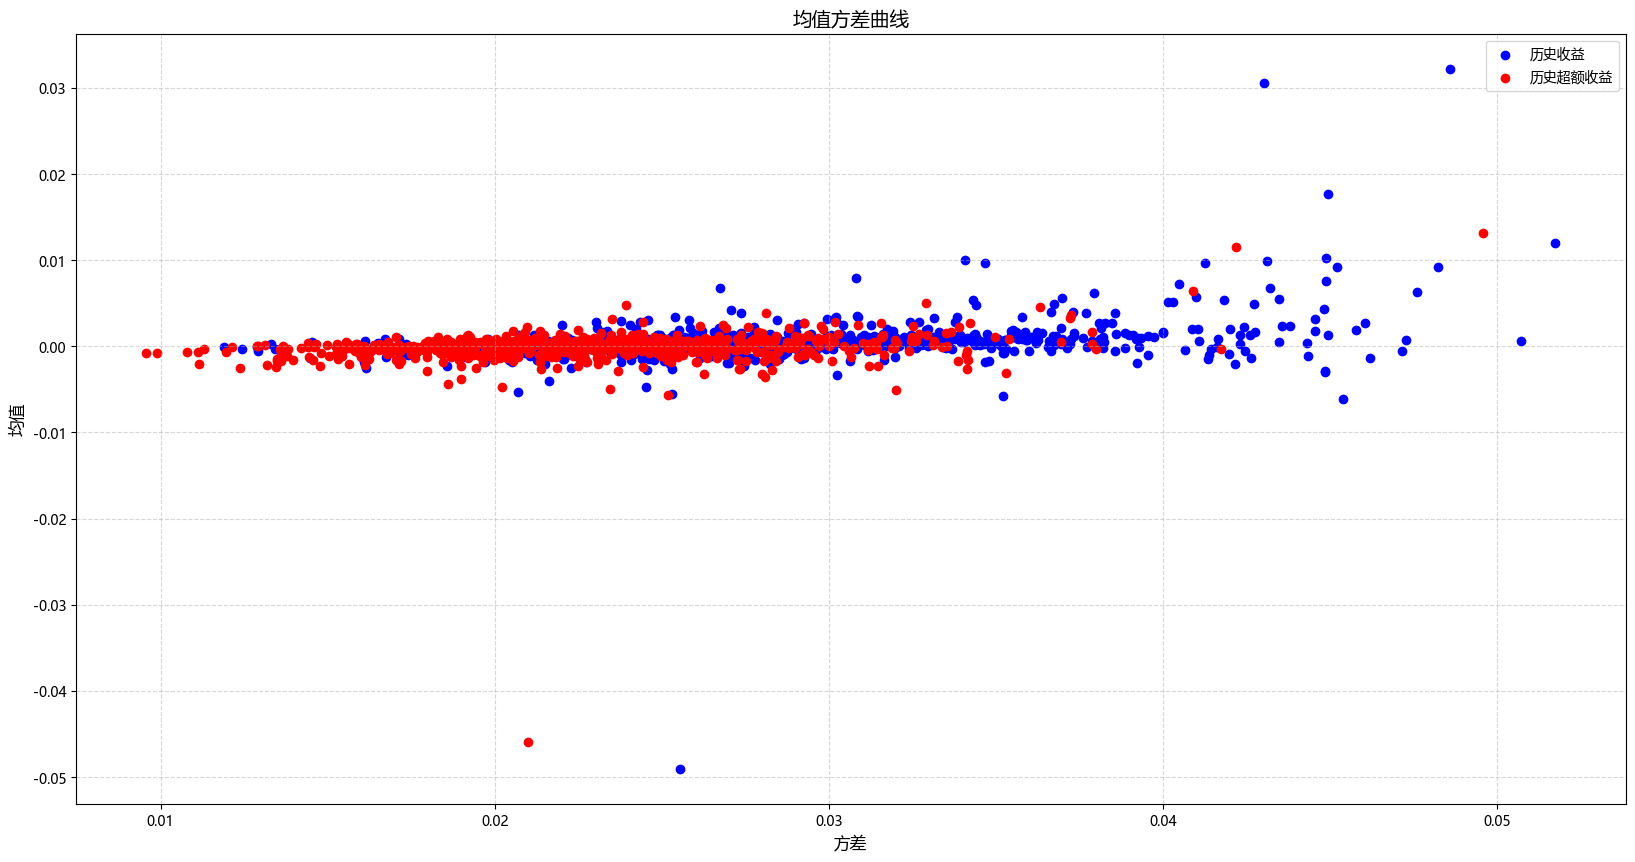

In [244]:
# 绘制曲线图
plt.figure(figsize=(20, 10))         # 设置图像大小
plt.scatter(df_hs300_c_s_history_excess_rate['历史收益方差'], df_hs300_c_s_history_excess_rate['历史平均收益'], label='历史收益', color='blue')
plt.scatter(df_hs300_c_s_history_excess_rate['历史超额收益方差'], df_hs300_c_s_history_excess_rate['历史平均超额收益'], label='历史超额收益', color='red')

# 添加标题和标签
plt.title('均值方差曲线', fontsize=14)
plt.xlabel('方差', fontsize=12)
plt.ylabel('均值', fontsize=12)

# 添加图例和网格
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# 显示图像
plt.show()

In [256]:
df_hs300_c_s_history_excess_rate[(df_hs300_c_s_history_excess_rate['历史平均超额收益']>0) & (df_hs300_c_s_history_excess_rate['历史平均收益']>0) & (df_hs300_c_s_history_excess_rate['历史平均收益/历史收益方差'] >0.018) & (df_hs300_c_s_history_excess_rate['历史平均超额收益/历史超额收益方差'] >0.018)]

,历史平均超额收益,历史平均收益,历史收益方差,历史超额收益方差,历史平均超额收益/历史超额收益方差,历史平均收益/历史收益方差
股票代码,,,,,,
1,0.000491,0.000830,0.025294,0.016794,0.029248,0.032822
2,0.000477,0.000937,0.027246,0.020198,0.023609,0.034402
9,0.000601,0.001086,0.034341,0.027942,0.021523,0.031631
12,0.000451,0.000811,0.033357,0.024998,0.018030,0.024315
24,0.000725,0.001205,0.033874,0.026043,0.027842,0.035578
...,...,...,...,...,...,...
603799,0.001050,0.001492,0.036379,0.031582,0.033259,0.041025
603833,0.000557,0.001002,0.025751,0.021135,0.026377,0.038896
603899,0.001693,0.002786,0.024352,0.020900,0.080988,0.114427


In [260]:
target_stock = df_hs300_c_s_history_excess_rate[(df_hs300_c_s_history_excess_rate['历史平均超额收益']>0) & (df_hs300_c_s_history_excess_rate['历史平均收益']>0) & (df_hs300_c_s_history_excess_rate['历史平均收益/历史收益方差'] >0.018) & (df_hs300_c_s_history_excess_rate['历史平均超额收益/历史超额收益方差'] >0.018)].index

In [262]:
target_stock

Index([     1,      2,      9,     12,     24,     59,     61,     63,     99,
          100,
       ...
       603160, 603259, 603288, 603369, 603501, 603799, 603833, 603899, 603986,
       603993],
      dtype='int64', name='股票代码', length=188)

In [278]:
df_target_stock_info = df_hs300_c_s_p_merge_new[df_hs300_c_s_p_merge_new['股票代码'].isin(target_stock)]

In [276]:
df_hs300_c_s_p_merge_new['股票代码'].isin(target_stock)

0          True
295        True
590        True
885        True
1180       True
          ...  
214721    False
215017    False
215314    False
215611    False
215908    False
Name: 股票代码, Length: 215909, dtype: bool

In [280]:
df_target_stock_info

,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred,rank_rate,rank_rate_plus1,rank_rate_minus1
0,2021-01-04,1,19.10,19.10,18.44,18.60,155421643.0,2.891682e+09,3.609501e+11,1.940575e+10,-0.038263,0.9102,183.0,284.0,NaN,273.0
295,2021-01-05,1,18.40,18.48,17.80,18.17,182135210.0,3.284607e+09,3.526055e+11,1.940575e+10,-0.023118,0.9102,243.0,273.0,284.0,9.0
590,2021-01-06,1,18.08,19.56,18.00,19.56,193494512.0,3.648522e+09,3.795798e+11,1.940575e+10,0.076500,0.9102,105.0,9.0,273.0,94.0
885,2021-01-07,1,19.52,19.98,19.23,19.90,158418530.0,3.111275e+09,3.861778e+11,1.940575e+10,0.017382,0.9102,264.0,94.0,9.0,179.0
1180,2021-01-08,1,19.90,20.10,19.31,19.85,119547322.0,2.348316e+09,3.852075e+11,1.940575e+10,-0.002513,0.9102,147.0,179.0,94.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214704,2023-12-25,603993,4.90,4.95,4.87,4.93,76115676.0,3.735495e+08,1.064843e+11,1.766577e+10,0.006122,0.2140,16.0,123.0,57.0,96.0
215000,2023-12-26,603993,4.93,4.94,4.89,4.92,56692336.0,2.785764e+08,1.062683e+11,1.766577e+10,-0.002028,0.2140,79.0,96.0,123.0,11.0
215297,2023-12-27,603993,4.91,5.12,4.91,5.08,151966596.0,7.658313e+08,1.097241e+11,1.766577e+10,0.032520,0.2140,15.0,11.0,96.0,188.0
215594,2023-12-28,603993,5.11,5.25,5.10,5.16,163415379.0,8.466125e+08,1.114521e+11,1.766577e+10,0.015748,0.2140,116.0,188.0,11.0,92.5


In [292]:
df_target_stock_info['new_pred'] = df_target_stock_info.groupby('交易日期')['pred'].rank(ascending=True)
df_target_stock_info

C:\Users\Shower\AppData\Local\Temp\ipykernel_36412\988394852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_stock_info['new_pred'] = df_target_stock_info.groupby('交易日期')['pred'].rank(ascending=True)


,交易日期,股票代码,开盘价,最高价,最低价,收盘价,成交量（手）,成交金额（千元）,总市值,流通股,涨跌幅（%）,权重,pred,rank_rate,rank_rate_plus1,rank_rate_minus1,new_pred
0,2021-01-04,1,19.10,19.10,18.44,18.60,155421643.0,2.891682e+09,3.609501e+11,1.940575e+10,-0.038263,0.9102,183.0,284.0,NaN,273.0,46.0
295,2021-01-05,1,18.40,18.48,17.80,18.17,182135210.0,3.284607e+09,3.526055e+11,1.940575e+10,-0.023118,0.9102,243.0,273.0,284.0,9.0,78.0
590,2021-01-06,1,18.08,19.56,18.00,19.56,193494512.0,3.648522e+09,3.795798e+11,1.940575e+10,0.076500,0.9102,105.0,9.0,273.0,94.0,30.0
885,2021-01-07,1,19.52,19.98,19.23,19.90,158418530.0,3.111275e+09,3.861778e+11,1.940575e+10,0.017382,0.9102,264.0,94.0,9.0,179.0,86.0
1180,2021-01-08,1,19.90,20.10,19.31,19.85,119547322.0,2.348316e+09,3.852075e+11,1.940575e+10,-0.002513,0.9102,147.0,179.0,94.0,36.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214704,2023-12-25,603993,4.90,4.95,4.87,4.93,76115676.0,3.735495e+08,1.064843e+11,1.766577e+10,0.006122,0.2140,16.0,123.0,57.0,96.0,2.0
215000,2023-12-26,603993,4.93,4.94,4.89,4.92,56692336.0,2.785764e+08,1.062683e+11,1.766577e+10,-0.002028,0.2140,79.0,96.0,123.0,11.0,21.0
215297,2023-12-27,603993,4.91,5.12,4.91,5.08,151966596.0,7.658313e+08,1.097241e+11,1.766577e+10,0.032520,0.2140,15.0,11.0,96.0,188.0,2.0
215594,2023-12-28,603993,5.11,5.25,5.10,5.16,163415379.0,8.466125e+08,1.114521e+11,1.766577e+10,0.015748,0.2140,116.0,188.0,11.0,92.5,36.0


In [ ]:
df_hs300_c_s_history.groupby('股票代码')['涨跌幅（%）'].s

In [54]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df_hs300_c_s_p['pred'].corr(), annot=True, cmap='inferno');
# plt.show()